### Configuration and Datasetup

In [12]:
# !pip install google-cloud-discoveryengine

In [13]:
# ! pip install --upgrade google-cloud-discoveryengine -q --user

In [40]:
# TODO(developer): Uncomment these variables before running the sample.
# location = "YOUR_LOCATION" # Values: "global"
# data_store_id = "YOUR_DATA_STORE_ID"

# Must specify either `gcs_uri` or (`bigquery_dataset` and `bigquery_table`)
# Format: `gs://bucket/directory/object.json` or `gs://bucket/directory/*.json`
# gcs_uri = "YOUR_GCS_PATH"
# bigquery_dataset = "YOUR_BIGQUERY_DATASET"
# bigquery_table = "YOUR_BIGQUERY_TABLE"

GCP_PROJECT= PROJECT_ID=project_id='my-project-0004-346516'
LOCATION = location = "global"
# FILE_PATH =file_path =  "Winnie_the_Pooh_3_Pages.pdf"
data_store_id = ""

# Refer to https://cloud.google.com/document-ai/docs/file-types # for supported file types
MIME_TYPE =mime_type = "application/pdf"

gcs_uri = "gs://my-project-0004-346516/matchingengine/books/"

In [41]:
from typing import Optional

from google.api_core.client_options import ClientOptions
from google.cloud import discoveryengine

from google.cloud import discoveryengine_v1alpha as discoveryengine
from google.api_core.client_options import ClientOptions

In [17]:
!gsutil cp -r ./books/* 'gs://my-project-0004-346516/matchingengine/books/'

Copying file://./books/Book1_The_Sorcerers_Stone.pdf [Content-Type=application/pdf]...
Copying file://./books/Book2_The_Chamber_of_Secrets.pdf [Content-Type=application/pdf]...
Copying file://./books/Book3_The_Prisoner_of_Azkaban.pdf [Content-Type=application/pdf]...
Copying file://./books/Book4_The_Goblet_of_Fire.pdf [Content-Type=application/pdf]...
- [4 files][  8.8 MiB/  8.8 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file://./books/Book5_The_Order_of_the_Phoenix.pdf [Content-Type=application/pdf]...
Copying file://./books/Book6_The_HalfBlood_Prince.pdf [Content-Type=application/pdf]...
Copying file://./books/Book7_The_Deathly_Hallows.pdf [Content-Type=application/pdf]...
\ [7 files][ 17.8 MiB/ 17.8 MiB]              

In [42]:
!gsutil ls 'gs://my-project-0004-346516/matchingengine/books/'

gs://my-project-0004-346516/matchingengine/books/
gs://my-project-0004-346516/matchingengine/books/Book1_The_Sorcerers_Stone.pdf
gs://my-project-0004-346516/matchingengine/books/Book2_The_Chamber_of_Secrets.pdf
gs://my-project-0004-346516/matchingengine/books/Book3_The_Prisoner_of_Azkaban.pdf
gs://my-project-0004-346516/matchingengine/books/Book4_The_Goblet_of_Fire.pdf
gs://my-project-0004-346516/matchingengine/books/Book5_The_Order_of_the_Phoenix.pdf
gs://my-project-0004-346516/matchingengine/books/Book6_The_HalfBlood_Prince.pdf
gs://my-project-0004-346516/matchingengine/books/Book7_The_Deathly_Hallows.pdf


### Setup Gemini Pro

In [25]:
# !pip install --upgrade google-cloud-aiplatform
GCP_PROJECT= PROJECT_ID=project_id='my-project-0004-346516'
LOCATION = REGION = 'us-central1'
import os

# import streamlit as st
import vertexai
from vertexai.preview.language_models import TextGenerationModel

vertexai.init(project=PROJECT_ID, location=LOCATION)


# @st.cache_resource
def get_model():
    generation_model = TextGenerationModel.from_pretrained("text-bison@002")
    return generation_model


def get_text_generation(prompt="", **parameters):
    generation_model = get_model()
    response = generation_model.predict(prompt=prompt, **parameters)

    return response.text

import vertexai
from vertexai.language_models import TextGenerationModel

vertexai.init(project=PROJECT_ID, location=LOCATION)
parameters = {
    "candidate_count": 1,
    "max_output_tokens": 1024,
    "temperature": 1,
    "top_k": 40
}

def generate_palm_unicorn_v1(input_prompt):
    
    model = TextGenerationModel.from_pretrained("text-unicorn@001")

    response = model.predict(
        input_prompt,
        **parameters
    )
    print(f"Response from Model: {response.text}")
    
    return(response.text)

def generate_palm_bison32k(input_prompt):
    
    model = TextGenerationModel.from_pretrained("text-bison-32k")

    response = model.predict(
        input_prompt,
        **parameters
    )
    print(f"Response from Model: {response.text}")
    
    return(response.text)

import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

# input_prompt = """can you give me details of paracetamol"""

def generate(input_prompt):
    model = GenerativeModel("gemini-ultra")
    responses = model.generate_content(
        input_prompt ,
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 0.2,
        "top_p": 1,
        "top_k": 32
    },
        safety_settings=[],
        stream=True,
    )
    
    all_response  = []
    
    for response in responses:
        # print(response.text, end="")
        all_response.append(response.text)
    
    # print (all_response)
    
    return(" ".join(all_response))
    

def generate_pro(input_prompt):
    model = GenerativeModel("gemini-pro")
    responses = model.generate_content(
    input_prompt,
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 0.2,
        "top_p": 1
    },stream=True,)
    
    all_response  = []
    
    for response in responses:
        all_response.append(response.text)
    
    # print (all_response)
    
    return(" ".join(all_response))


### Create an empty datastore

In [43]:
def create_data_store(
    project_id: str, location: str, data_store_name: str, data_store_id: str
):
    # Create a client
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )
    client = discoveryengine.DataStoreServiceClient(client_options=client_options)

    # Initialize request argument(s)
    data_store = discoveryengine.DataStore(
        display_name=data_store_name,
        industry_vertical="GENERIC",
        content_config="CONTENT_REQUIRED",
    )

    request = discoveryengine.CreateDataStoreRequest(
        parent=discoveryengine.DataStoreServiceClient.collection_path(
            project_id, location, "default_collection"
        ),
        data_store=data_store,
        data_store_id=data_store_id,
    )
    operation = client.create_data_store(request=request)

    # Make the request
    # The try block is necessary to prevent execution from haulting due to an error being thrown when the datastore takes a while to instantiate
    try:
        response = operation.result(timeout=90)
    except:
        print("long-running operation")


In [44]:
# The datastore name can only contain lowercase letters, numbers, and hyphens
DATASTORE_NAME = "harry-potter-books"
DATASTORE_ID = f"{DATASTORE_NAME}-id"



In [ ]:
create_data_store(PROJECT_ID, LOCATION, DATASTORE_NAME, DATASTORE_ID)

### Import Document

In [7]:
def import_documents(
    project_id: str,
    location: str,
    data_store_id: str,
    gcs_uri: str,
):
    # Create a client
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )
    client = discoveryengine.DocumentServiceClient(client_options=client_options)

    # The full resource name of the search engine branch.
    # e.g. projects/{project}/locations/{location}/dataStores/{data_store_id}/branches/{branch}
    parent = client.branch_path(
        project=project_id,
        location=location,
        data_store=data_store_id,
        branch="default_branch",
    )

    source_documents = [f"{gcs_uri}/*"]

    request = discoveryengine.ImportDocumentsRequest(
        parent=parent,
        gcs_source=discoveryengine.GcsSource(
            input_uris=source_documents, data_schema="content"
        ),
        # Options: `FULL`, `INCREMENTAL`
        reconciliation_mode=discoveryengine.ImportDocumentsRequest.ReconciliationMode.INCREMENTAL,
    )

    # Make the request
    operation = client.import_documents(request=request)

    response = operation.result()

    # Once the operation is complete,
    # get information from operation metadata
    metadata = discoveryengine.ImportDocumentsMetadata(operation.metadata)

    # Handle the response
    return operation.operation.name



In [ ]:
# print(gcs_uri)

source_documents_gs_uri = (
"gs://my-project-0004-346516/matchingengine/books")

import_documents(PROJECT_ID, LOCATION, DATASTORE_ID, source_documents_gs_uri)
    
# "gs://my-project-0004-346516/matchingengine/books/Book2_The_Chamber_of_Secrets.pdf",
# "gs://my-project-0004-346516/matchingengine/books/Book3_The_Prisoner_of_Azkaban.pdf",
# "gs://my-project-0004-346516/matchingengine/books/Book4_The_Goblet_of_Fire.pdf",
# "gs://my-project-0004-346516/matchingengine/books/Book5_The_Order_of_the_Phoenix.pdf",
# "gs://my-project-0004-346516/matchingengine/books/Book6_The_HalfBlood_Prince.pdf",
# "gs://my-project-0004-346516/matchingengine/books/Book7_The_Deathly_Hallows.pdf",


### Create a Search Engine
This is used to set the search_tier to enterprise and to enable advanced LLM features.

Enterprise tier is required to get extractive answers from a search query and advanced LLM features are required to sumarize search results.

In [45]:
def create_engine(
    project_id: str, location: str, data_store_name: str, data_store_id: str
):
    # Create a client
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )
    client = discoveryengine.EngineServiceClient(client_options=client_options)

    # Initialize request argument(s)
    config = discoveryengine.Engine.SearchEngineConfig(
        search_tier="SEARCH_TIER_ENTERPRISE", search_add_ons=["SEARCH_ADD_ON_LLM"]
    )

    engine = discoveryengine.Engine(
        display_name=data_store_name,
        solution_type="SOLUTION_TYPE_SEARCH",
        industry_vertical="GENERIC",
        data_store_ids=[data_store_id],
        search_engine_config=config,
    )

    request = discoveryengine.CreateEngineRequest(
        parent=discoveryengine.DataStoreServiceClient.collection_path(
            project_id, location, "default_collection"
        ),
        engine=engine,
        engine_id=engine.display_name,
    )

    # Make the request
    operation = client.create_engine(request=request)
    response = operation.result(timeout=90)


In [28]:
create_engine(PROJECT_ID, LOCATION, DATASTORE_NAME, DATASTORE_ID)

### Query your Datastore


In [46]:
from typing import List


def search_sample(
    project_id: str,
    location: str,
    data_store_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse]:
    #  For more information, refer to:
    # https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store
    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if LOCATION != "global"
        else None
    )

    # Create a client
    client = discoveryengine.SearchServiceClient(client_options=client_options)

    # The full resource name of the search engine serving config
    # e.g. projects/{project_id}/locations/{location}/dataStores/{data_store_id}/servingConfigs/{serving_config_id}
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=data_store_id,
        serving_config="default_config",
    )

    # Optional: Configuration options for search
    # Refer to the `ContentSearchSpec` reference for all supported fields:
    # https://cloud.google.com/python/docs/reference/discoveryengine/latest/google.cloud.discoveryengine_v1.types.SearchRequest.ContentSearchSpec
    content_search_spec = discoveryengine.SearchRequest.ContentSearchSpec(
        # For information about snippets, refer to:
        # https://cloud.google.com/generative-ai-app-builder/docs/snippets
        snippet_spec=discoveryengine.SearchRequest.ContentSearchSpec.SnippetSpec(
            return_snippet=True
        ),
        # For information about search summaries, refer to:
        # https://cloud.google.com/generative-ai-app-builder/docs/get-search-summaries
        summary_spec=discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec(
            summary_result_count=5,
            include_citations=True,
            ignore_adversarial_query=True,
            ignore_non_summary_seeking_query=True,
        ),
    )

    # Refer to the `SearchRequest` reference for all supported fields:
    # https://cloud.google.com/python/docs/reference/discoveryengine/latest/google.cloud.discoveryengine_v1.types.SearchRequest
    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
        page_size=10,
        content_search_spec=content_search_spec,
        query_expansion_spec=discoveryengine.SearchRequest.QueryExpansionSpec(
            condition=discoveryengine.SearchRequest.QueryExpansionSpec.Condition.AUTO,
        ),
        spell_correction_spec=discoveryengine.SearchRequest.SpellCorrectionSpec(
            mode=discoveryengine.SearchRequest.SpellCorrectionSpec.Mode.AUTO
        ),
    )

    response = client.search(request)
    return response

In [47]:
query = "Who is the best friend of harry potter?"

print(search_sample(PROJECT_ID, LOCATION, DATASTORE_ID, query).summary.summary_text)

Ron Weasley and Hermione Granger are Harry Potter's best friends at Hogwarts [1, 2].


### Code to Run through all the Q&A and RAG

In [50]:
Gemini_query
generate_pro(Gemini_query)

'The information provided does not specify what Harry did to get him temporarily expelled from Hogwarts. It only mentions that he did serious magic, which broke the Decree for the  Restriction of Underage Wizardry.'

In [51]:
import pandas as pd
import time

filename = "./harry_potte_qa_output.csv"
df_qa_VertexSearch = pd.read_csv(filename, sep ="|")

System_Prompts = """ You are an expert in reading harry potter books, but only provide evidences from the information provide and do not use an other information
so here are some search results : 
"""

Question_Prompts = """ -- Based on information above help to answer following user question
"""


for i in range(0, len(df_qa_VertexSearch)):
    
    print("iteration #", i)
    
    
    RAG_query = df_qa_VertexSearch.loc[i,'Question'] 
    
    print(RAG_query)
    RAG_results = search_sample(PROJECT_ID, LOCATION, DATASTORE_ID, RAG_query).summary.summary_text
    
    Gemini_query = System_Prompts + " " + RAG_results + " " + Question_Prompts + " " + df_qa_VertexSearch.loc[i,'Question']
    
    try:        
        df_qa_VertexSearch.loc[i, "Gemini_pro_model_output_v1"] = generate_pro(Gemini_query)
        df_qa_VertexSearch.loc[i, "palm_bison32k_output_v1"] = generate_palm_bison32k(Gemini_query)

    except:
        df_qa_VertexSearch.loc[i, "Gemini_pro_model_output_v1"] = "No answer found"
        df_qa_VertexSearch.loc[i, "palm_bison32k_output_v1"] = "No answer found"
        print("long-running operation")



output1 = "./harry_potter_qa_model_RAG_VertexSearch.csv"

df_qa_VertexSearch.to_csv(output1)



iteration # 0
What is the name of the magical creature that can only be seen by those who have witnessed death? 
Response from Model:  The provided information does not mention any magical creature that can only be seen by those who have witnessed death. So I cannot answer this question.
iteration # 1
What is the name of the school newspaper at Hogwarts? 
Response from Model:  The name of the school newspaper at Hogwarts is the Daily Prophet.
iteration # 2
What is the name of the magical map that shows the entire layout of Hogwarts? 
Response from Model:  The Marauder's Map
iteration # 3
Which Hogwarts house does Luna Lovegood belong to? 
Response from Model:  The provided text does not specify which Hogwarts house Luna Lovegood belongs to.
iteration # 4
What magical creature is known for guarding Gringott's Bank? 
Response from Model:  The magical creature known for guarding Gringott's Bank is a dragon.

In Harry Potter and the Sorcerer's Stone, Hagrid mentions that Gringotts is guard

ServiceUnavailable: 503 The service is currently unavailable.

## Generating factual question about the topics

In [72]:
import os
import vertexai
from vertexai.preview.language_models import TextGenerationModel
from vertexai.preview.generative_models import GenerativeModel, Part
Region = "us-centra1"
GCP_PROJECT= PROJECT_ID=project_id='my-project-0004-346516'

vertexai.init()

def generate_pro(input_prompt):
    model = GenerativeModel("gemini-pro")
    responses = model.generate_content(
    input_prompt,
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 0.2,
        "top_p": 1
    },stream=True,)
    
    all_response  = []
    
    for response in responses:
        all_response.append(response.text)
    
    # print (all_response)
    
    return(" ".join(all_response))

In [87]:
from vertexai.preview.vision_models import ImageGenerationModel

imagen_model = ImageGenerationModel.from_pretrained("imagegeneration@005")

What is a quote from Harry Potter and the Sorcerer's Stone? 


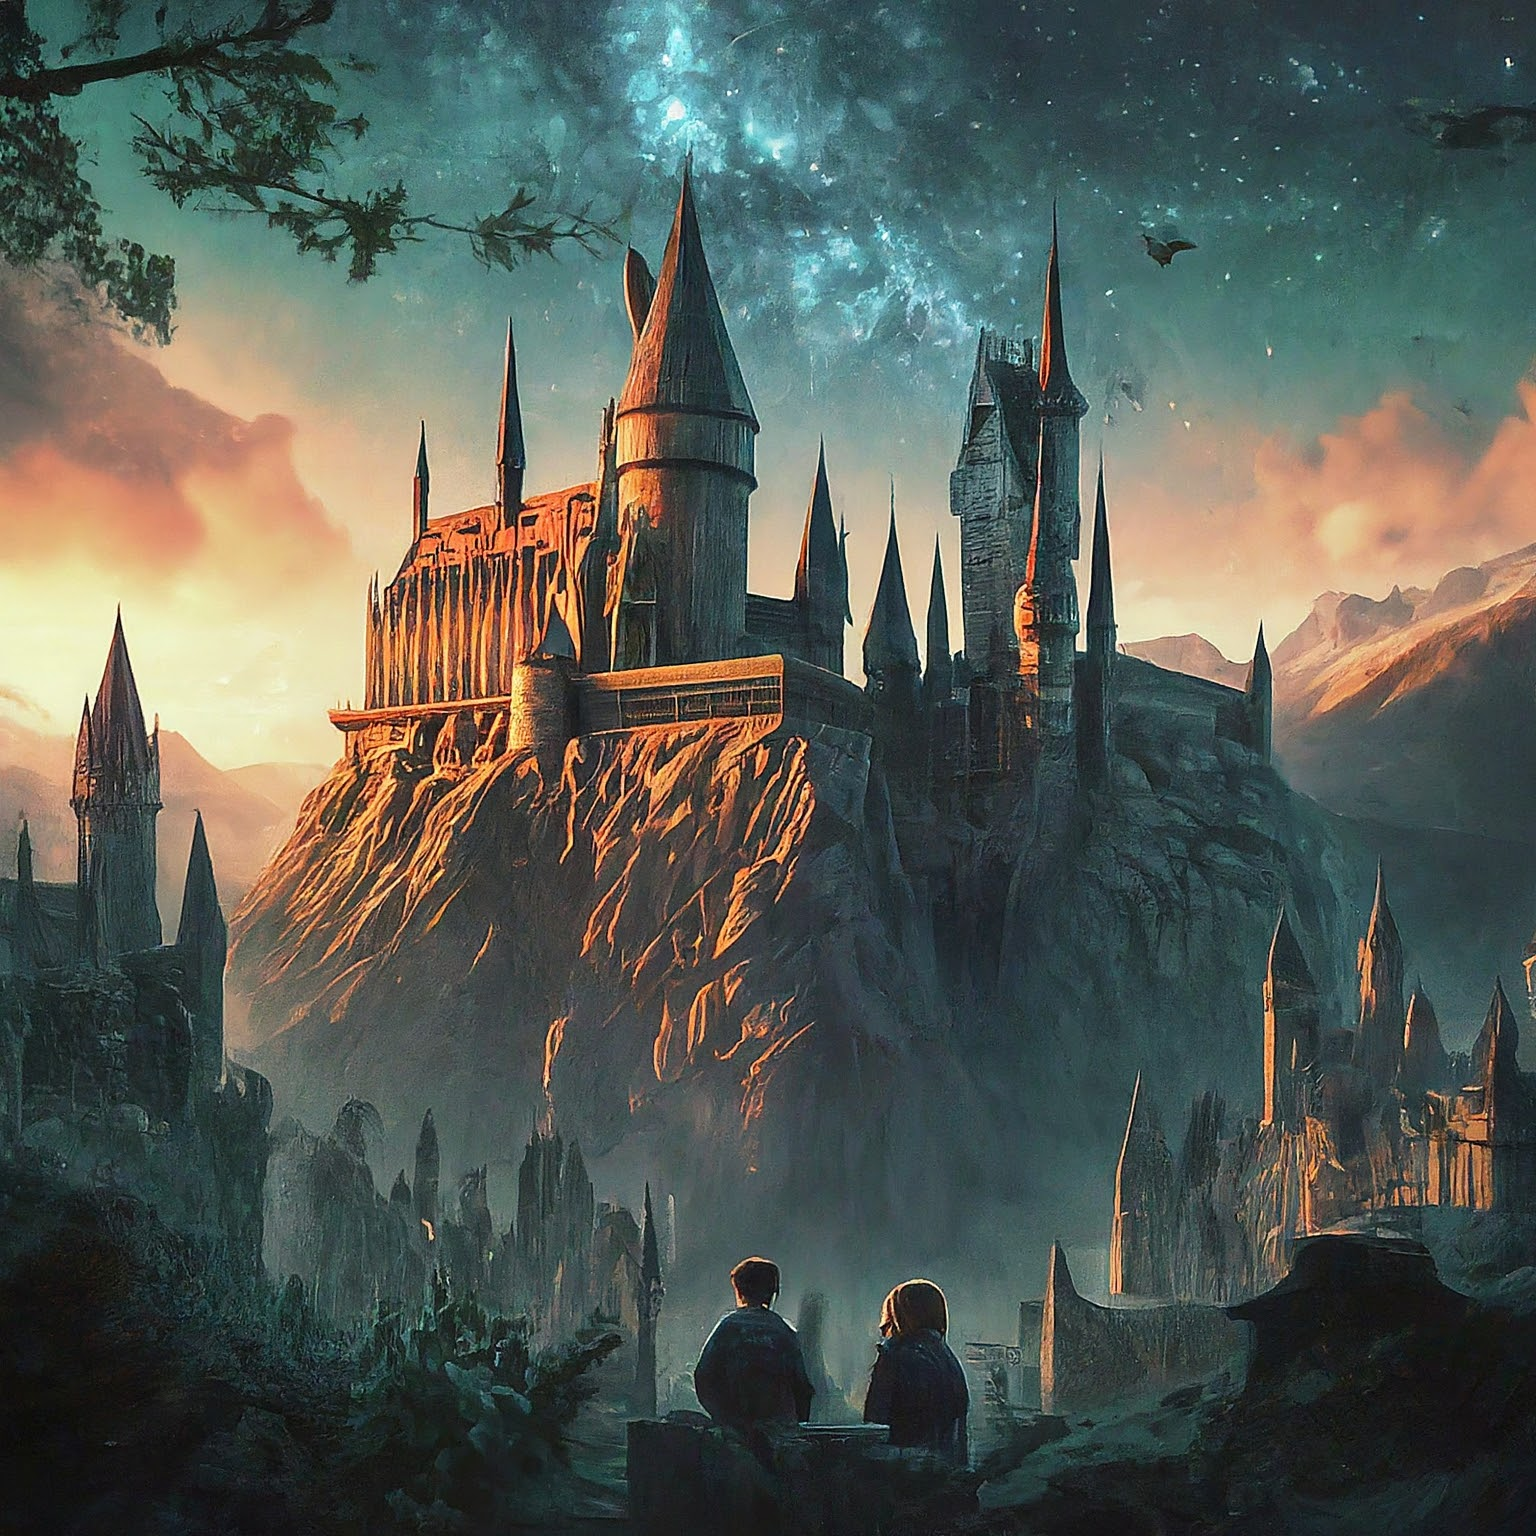

What is a quote from Harry Potter and the Sorcerer's Stone? 
new_topic - Magical School Adventures
- Boy Wizard's Journey
- Friendship and Courage
What are some books that are about a boy wizard's journey?


InvalidArgument: 400 Image generation failed with the following error: The response is blocked, as it may violate our policies. If you believe this is an error, please send feedback to your account team. Error Code: 58061214

In [88]:
prev_question = ""
new_topic = ""
LOCATION='global'

for i in range(0,20):

    query = "Generate a question based on the facts from the search "
    
    full_query = query + "  do not generate repeated questions /n \n  but you may choose this topic here :: " + str(new_topic)
    
    question = search_sample(PROJECT_ID, LOCATION, DATASTORE_ID, full_query).summary.summary_text
    print(question)
    
    if prev_question == question :
        input_prompt = " do not generate topic related to this :: -- " + new_topic  + \
        "   give me a two or three word topic about happy potter "
        new_topic = generate_pro(input_prompt)
        print("new_topic", new_topic)
    
    if prev_question != question :
        # input_question = "What is a quote from Harry Potter and the Sorcerer's Stone"
        system_prompt = " Convert this question to a meaning prompt for imagen model to create a good image"

        prompt = question + " " + system_prompt
        image_prompt = generate_pro(prompt)

        
        try:
            # Code that may break
            response = imagen_model.generate_images( prompt=image_prompt,)
            response.images[0].show()
        
        except Exception as e:
            # Handle the exception
            print(f"An error occurred: {e}")
            print("skipping to next question - no image for this")

    prev_question = question
    